# Unit 1: Exploratory Data Analysis on the MovieLens 100k Dataset

In these lessons, we will be working a lot with [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) and numpy - so please take the time to at least get yourself familiar with it, e.g. with [10 Minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html).

The [MovieLens](https://grouplens.org/datasets/movielens/) datasets are for recommender systems practitioners and researchers what MNIST is for computer vision people. Of course, the MovieLens datasets are not the only public datasets used in the RecSys community, but one of the most widely used. There are also the
* [Million Song Dataset](http://millionsongdataset.com/)
* [Amazon product review dataset](https://nijianmo.github.io/amazon/index.html)
* [Criteo datasets](https://labs.criteo.com/category/dataset/)
* [Twitter RecSys Challenge 2020](https://recsys-twitter.com/previous_challenge)
* [Spotify Million Playlist Dataset](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge)
* [YooChoose RecSys Challenge 2015](https://www.kaggle.com/chadgostopp/recsys-challenge-2015)
* [BookCrossings](http://www2.informatik.uni-freiburg.de/~cziegler/BX/) and many more

On _kdnuggets_ you can find a [simple overview](https://www.kdnuggets.com/2016/02/nine-datasets-investigating-recommender-systems.html) of some of them.

MovieLens comes in different sizes regarding the number of movie ratings, user, items. Take a look at the GroupLens website and explore them youself.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
from recsys_training.data import genres

In [3]:
ml100k_ratings_filepath = '../../data/raw/ml-100k/u.data'
ml100k_item_filepath = '../../data/raw/ml-100k/u.item'
ml100k_user_filepath = '../../data/raw/ml-100k/u.user'

## Load Data

In [4]:
ratings = pd.read_csv(ml100k_ratings_filepath,
                      sep='\t',
                      header=None,
                      names=['user', 'item', 'rating', 'timestamp'],
                      engine='python')

In [5]:
items = pd.read_csv(ml100k_item_filepath, sep='|', header=None,
                    names=['item', 'title', 'release', 'video_release', 'imdb_url']+genres,
                    engine='python')

In [6]:
users = pd.read_csv(ml100k_user_filepath, sep='|', header=None,
                    names=['user', 'age', 'gender', 'occupation', 'zip'])

## Data Exploration

In this unit, we like to get a better picture of the data we use for making recommendations in the upcoming units. Therefore, let's review some statistics to become confident with the data.

![](../parrot.png)

**Task:**
Let's look into the following:

* number of users
* number of items
* rating distribution
* user / item mean ratings
* popularity skewness
    * user rating count distribution
    * item rating count distribution
* time
* sparsity
* user / item features

### number of users

In [7]:
n_users = ratings['user'].unique().shape[0]
n_users

943

In [8]:
ratings['user'].unique().min()

1

In [9]:
ratings['user'].unique().max()

943

### number of items

In [10]:
n_items = ratings['item'].unique().shape[0]
n_items

1682

In [11]:
ratings['item'].unique().min()

1

In [12]:
ratings['item'].unique().max()

1682

### rating distribution

In [13]:
ratings['rating'].value_counts().sort_index()

1     6110
2    11370
3    27145
4    34174
5    21201
Name: rating, dtype: int64

In [14]:
ratings['rating'].value_counts(normalize=True).sort_index()

1    0.06110
2    0.11370
3    0.27145
4    0.34174
5    0.21201
Name: rating, dtype: float64

<AxesSubplot:>

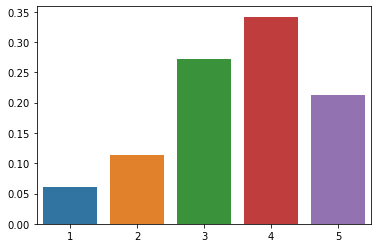

In [15]:
sns.barplot(x=ratings['rating'].value_counts(normalize=True).sort_index().index,
            y=ratings['rating'].value_counts(normalize=True).sort_index().values)

In [16]:
ratings['rating'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

### user rating count distribution

In [24]:
quantiles

50      0.00583
258     0.01092
100     0.01600
181     0.02107
294     0.02592
         ...   
1543    0.99996
1583    0.99997
1647    0.99998
711     0.99999
1663    1.00000
Name: item, Length: 1682, dtype: float64

/Users/mkurovski/anaconda3/envs/recsys_training/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='user'>

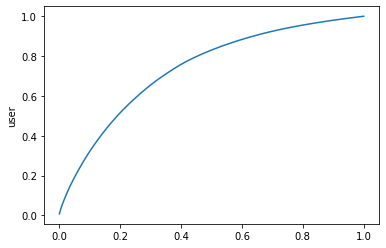

In [17]:
quantiles = ratings['user'].value_counts(normalize=True).cumsum()

sns.lineplot(np.arange(n_users)/n_users+1/n_users,
             quantiles)

### item rating count distribution

/Users/mkurovski/anaconda3/envs/recsys_training/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='item'>

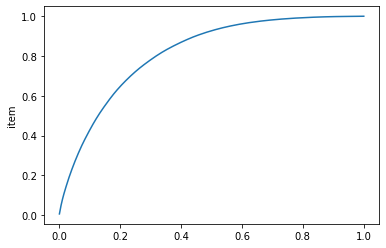

In [18]:
quantiles = ratings['item'].value_counts(normalize=True).cumsum()

sns.lineplot(np.arange(n_items)/n_items+1/n_items,
             quantiles)

### user mean ratings

In [19]:
user_mean_ratings = ratings[['user', 'rating']].groupby('user').mean().reset_index(drop=True)

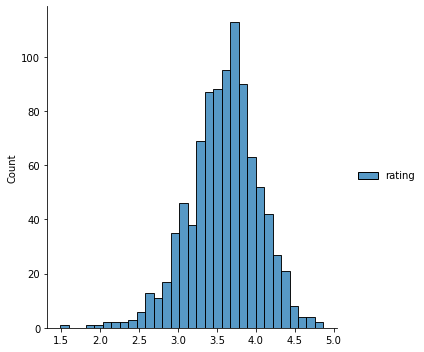

In [23]:
sns.displot(user_mean_ratings)

### item mean ratings

In [27]:
item_mean_ratings = ratings[['item', 'rating']].groupby('item').mean().reset_index(drop=True)

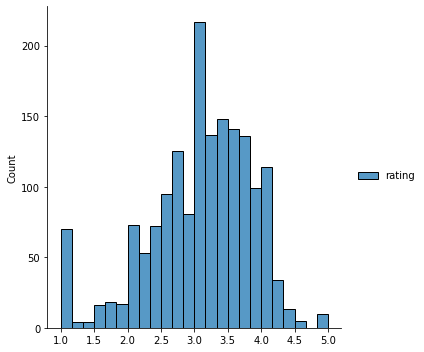

In [28]:
sns.displot(item_mean_ratings)

### sparsity

In [29]:
n_users

943

In [30]:
n_items

1682

In [31]:
# count the uniquely observed ratings
observed_ratings = ratings[['user', 'item']].drop_duplicates().shape[0]
observed_ratings

100000

In [32]:
potential_ratings = n_users * n_items
potential_ratings

1586126

In [33]:
density = observed_ratings / potential_ratings

In [34]:
density

0.06304669364224531

In [35]:
sparsity = 1 - density

In [36]:
sparsity

0.9369533063577546